In [49]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv("F:/Study/Wscube-tech/Machine-learning/Datasets/Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


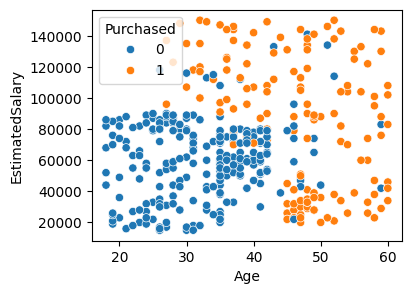

In [10]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [11]:
# scallinga
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
#knn.score(x_test,y_test)*100    testing accuracy (92.5)

In [42]:
knn.score(x_test,y_test)*100

91.25

In [43]:
#knn.score(x_train,y_train)*100    # traing accuracy (91.5625)

In [44]:
knn.score(x_train,y_train)*100

92.5

#### if testing accurcy is higher and training accuracy is lower then our modle is underfitting 

In [35]:
for i in range(1, 30) :
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train),knn1.score(x_test,y_test))

1 0.996875 0.85
2 0.915625 0.8625
3 0.925 0.9125
4 0.91875 0.925
5 0.909375 0.925
6 0.909375 0.9
7 0.91875 0.9375
8 0.90625 0.925
9 0.9125 0.9375
10 0.90625 0.925
11 0.909375 0.925
12 0.9125 0.925
13 0.915625 0.925
14 0.90625 0.925
15 0.90625 0.925
16 0.9 0.925
17 0.90625 0.925
18 0.9 0.925
19 0.909375 0.925
20 0.9 0.9375
21 0.903125 0.925
22 0.9 0.9375
23 0.903125 0.9375
24 0.89375 0.9375
25 0.9 0.9375
26 0.89375 0.9375
27 0.89375 0.925
28 0.8875 0.9375
29 0.8875 0.9375


In [46]:
knn.predict([[-1.781797	, -1.490046]]) # right answer 

C:\Users\Salman\AppData\Local\anaconda3\envs\env_python388\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [48]:
knn.predict([[1.083596   ,     -0.990844]]) # right answer 

C:\Users\Salman\AppData\Local\anaconda3\envs\env_python388\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [47]:
x,y

(          Age  EstimatedSalary
 0   -1.781797        -1.490046
 1   -0.253587        -1.460681
 2   -1.113206        -0.785290
 3   -1.017692        -0.374182
 4   -1.781797         0.183751
 ..        ...              ...
 395  0.797057        -0.844019
 396  1.274623        -1.372587
 397  1.179110        -1.460681
 398 -0.158074        -1.078938
 399  1.083596        -0.990844
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

C:\Users\Salman\AppData\Local\anaconda3\envs\env_python388\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


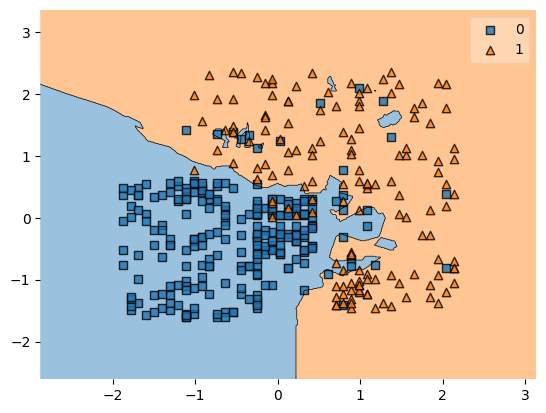

In [50]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()